# step 54 드롭아웃과 테스트 모드

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_path = '/content/notebooks'
# 구글드라이브 deep-learning-from-scratch-3-master 폴더에 있는 패키지를 colab에 심볼링크걸린 notebooks 폴더 생성 
os.symlink('/content/drive/MyDrive/Colab Notebooks/deep-learning-from-scratch-3-master', my_path)
# 파이썬 모듈 검색 경로추가
sys.path.insert(0, my_path)

## 54.1 드롭아웃이란

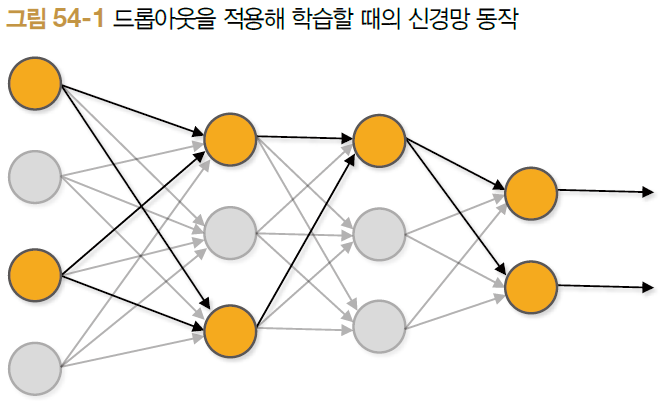

### 455~456

In [ ]:
import numpy as np

dropout_ratio = 0.6
x = np.ones(10)

mask = np.random.rand(10) > dropout_ratio
y = x * mask

### 457

In [ ]:
# 학습 시
mask = np.random.rand(*x.shape) > dropout_ratio
y = x * mask

# 테스트 시
scale = 1 - dropout_ratio # 학습 시에 살아남은 뉴런의 비율
y = x * scale

## 54.2 역 드롭아웃

### 458

In [ ]:
# 학습 시
scale = 1 - dropout_ratio  # 추가
mask = np.random.rand(*x.shape) > dropout_ratio
y = x * mask / scale  # 추가

# 테스트 시
y = x  # 추가

## 54.3 테스트 모드 추가

### 458~459 core.py

In [ ]:
# dezero/core.py
import contextlib  # 실행 하기 위해

class Config:
  enable_backprop = True
  train = True   # 추가

@contextlib.contextmanager
def using_config(name, value):
  old_value = getattr(Config, name)
  setattr(Config, name, value)
  yield
  setattr(Config, name, old_value)

def test_mode():  # 추가
  return using_config('train', False)  # 추가

## 54.4 드롭아웃 구현

### 459~460 functions.py

In [ ]:
# dezero/functions.py

def dropout(x, dropout_ratio=0.5):
  x = as_variable(x)

  if dezero.Config.train:
    xp = cuda.get_array_module(x)
    mask = xp.random.rand(*x.shape) > dropout_ratio
    scale = xp.array(1.0 - dropout_ratio).astype(x.dtype)
    y = x * mask / scale
    return y
  else:
    return x

### 460 step54.py

In [ ]:
# steps/step54.py

import numpy as np
from dezero import test_mode
import dezero.functions as F

x = np.ones(5)
print(x)

# 학습 시
y = F.dropout(x)
print(y)

# 테스트 시
with test_mode():
  y = F.dropout(x)
  print(y)

[1. 1. 1. 1. 1.]
variable([0. 0. 0. 2. 2.])
variable([1. 1. 1. 1. 1.])
